In [1]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
# import mpmath as mp
import pickle
from scipy.stats import binom
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ../cow.py

# Loudest Talker with Integral Downlink Blocklength

In [56]:
%%time

threshold = 10**(-9)
endpoint = 2
dfade = [10**(-3), 10**(-10), 10**(-3)]
dSNR = 0.01
# N = 2
start_nodes, end_nodes = 2, 36

# print "Hamming RS"
hsrs_codingscheme = '../data_tables/hs_rs_downlink'
# start_tSNR = 0
# hsrs_lti = np.zeros((end_nodes-start_nodes,))

for N in xrange(35, 1, -1):
    start_tSNR = lti_dct_tSNR[N]
#     hsrs_lti[N-start_nodes] = 1
    hsrs_lti[N-start_nodes] = loudest_talker_integral(N, hsrs_codingscheme, start_tSNR, dfade, dSNR)
    lti_dct_tSNR[N] = hsrs_lti[N-start_nodes] - dSNR
    print N, hsrs_lti[N-start_nodes]
# print ""

35 8.6
34 7.89
33 7.55
32 7.38
31 7.22
30 7.12
29 7.09
28 7.05
27 7.05
26 7.08
25 7.12
24 7.18
23 7.28
22 7.38
21 7.5
20 7.67
19 7.85
18 8.06
17 8.32
16 8.61
15 8.95
14 9.36
13 9.82
12 10.37
11 11.04
10 11.83
9 12.81
8 14.05
7 15.63
6 17.75
5 20.83
4

<string>:119: RuntimeWarning: divide by zero encountered in log10
<string>:123: RuntimeWarning: divide by zero encountered in log10
<string>:159: RuntimeWarning: divide by zero encountered in log10
<string>:164: RuntimeWarning: divide by zero encountered in log10
<string>:127: RuntimeWarning: divide by zero encountered in log10


 25.67
3 31.21
2 45.04
CPU times: user 2min 13s, sys: 9.03 s, total: 2min 22s
Wall time: 1min 32s


<string>:170: RuntimeWarning: divide by zero encountered in log10


In [54]:
# lti_dct_tSNR = {}
print lti_dct_tSNR
# for N_tSNR in hsrs_lti:
#     lti_dct_tSNR = 

{2: 45.0, 3: 31.200000000000003, 4: 25.600000000000009, 5: 20.800000000000011, 6: 17.70000000000001, 7: 15.599999999999998, 8: 14.0, 9: 12.799999999999997, 10: 11.799999999999997, 11: 11.0, 12: 10.299999999999999, 13: 9.7999999999999972, 14: 9.2999999999999989, 15: 8.8999999999999968, 16: 8.5999999999999979, 17: 8.2999999999999989, 18: 8.0, 19: 7.7999999999999972, 20: 7.5999999999999979, 21: 7.3999999999999986, 22: 7.2999999999999989, 23: 7.1999999999999993, 24: 7.0999999999999996, 25: 7.0999999999999996, 26: 7.0, 27: 7.0, 28: 7.0, 29: 7.0, 30: 7.0999999999999996, 31: 7.1999999999999993, 32: 7.2999999999999989, 33: 7.4999999999999982, 34: 7.7999999999999972, 35: 8.4999999999999982}


# Loudest Talker No Integral Downlink Blocklength

In [53]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = 0
start_nodes, end_nodes = 2, 36

hsrsscheme = '../data_tables/hs_rs_downlink'
hsrs_down = loudest_talker(hsrsscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
print hsrs_down

[ 46.93  32.97  25.88  21.57  18.66  16.58  15.02  13.8   12.83  12.05
  11.38  10.84  10.39   9.99   9.67   9.4    9.14   8.95   8.79   8.64
   8.54   8.47   8.39   8.37   8.38   8.37   8.44   8.54   8.65   8.86
   9.14   9.51  10.21  11.87]
CPU times: user 4.36 s, sys: 61.2 ms, total: 4.42 s
Wall time: 4.5 s


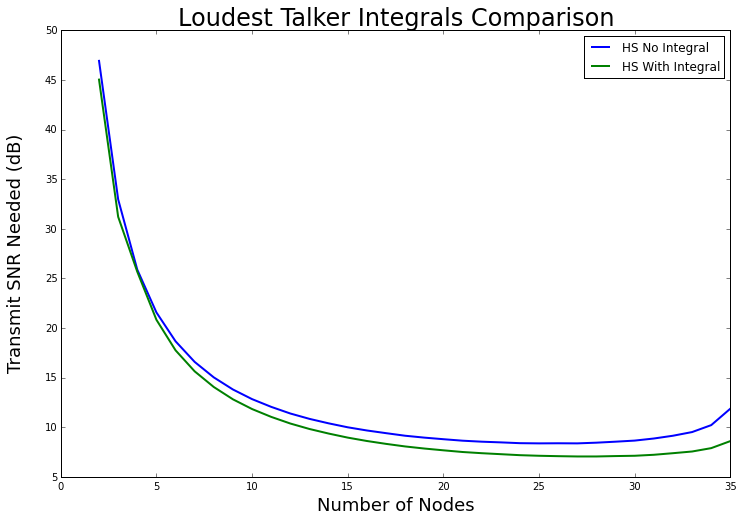

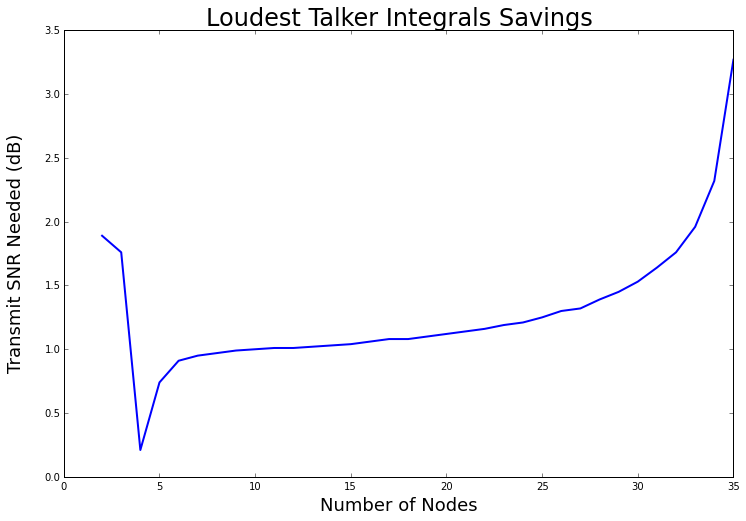

In [60]:
user_range = range(start_nodes, end_nodes)

figure(figsize=(12, 8))
plot(user_range, hsrs_down, lw=2.0, label='HS No Integral')
plot(user_range, hsrs_lti, lw=2.0, label='HS With Integral')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Integrals Comparison', fontsize=24)
savefig('loudest_integral_comparison.pdf', bbox='tight')

figure(figsize=(12, 8))
plot(user_range, hsrs_down-hsrs_lti, lw=2.0, label='HS No Integral')
# legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Integrals Savings', fontsize=24)
savefig('loudest_integral_savings.pdf', bbox='tight')

In [61]:
print hsrs_down-hsrs_lti

print {"lti": hsrs_lti}

[ 1.89  1.76  0.21  0.74  0.91  0.95  0.97  0.99  1.    1.01  1.01  1.02
  1.03  1.04  1.06  1.08  1.08  1.1   1.12  1.14  1.16  1.19  1.21  1.25
  1.3   1.32  1.39  1.45  1.53  1.64  1.76  1.96  2.32  3.27]
{'lti': array([ 45.04,  31.21,  25.67,  20.83,  17.75,  15.63,  14.05,  12.81,
        11.83,  11.04,  10.37,   9.82,   9.36,   8.95,   8.61,   8.32,
         8.06,   7.85,   7.67,   7.5 ,   7.38,   7.28,   7.18,   7.12,
         7.08,   7.05,   7.05,   7.09,   7.12,   7.22,   7.38,   7.55,
         7.89,   8.6 ])}


# Loudest Talker No Integral Uplink Blocklength

In [183]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = 0
start_nodes, end_nodes = 2, 36

hsrsscheme = '../data_tables/hs_rs_uplink'
hsrs_up = loudest_talker(hsrsscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
print hsrs_up

[ 47.33  33.68  26.86  22.77  20.07  18.11  16.79  15.69  14.94  14.29
  13.84  13.32  12.95  12.95  12.44  12.36  12.35  12.46  12.11  12.38
  12.11  12.58  12.33  13.12  12.91  12.71  14.01  13.85  13.7   16.24
  16.12  16.03  15.95  15.86]
CPU times: user 5.26 s, sys: 86 ms, total: 5.34 s
Wall time: 6.47 s


# Loudest Talker With Integral Uplink Blocklength

In [181]:
%%time

threshold = 10**(-9)
endpoint = 2
dfade = [10**(-3), 10**(-10), 10**(-3)]
dSNR = 0.01
# N = 2
start_nodes, end_nodes = 2, 36

hsrs_codingscheme = '../data_tables/hs_rs_uplink'
hsrs_lti_up = np.zeros((end_nodes-start_nodes,))

lti_dct_tSNR_up = {}
for N in xrange(35, 1, -1):
    lti_dct_tSNR_up[N] = 0

for dSNR in [10**i for i in range(0, -3, -1)]:
    for N in xrange(35, 1, -1):
        start_tSNR = lti_dct_tSNR_up[N]
        hsrs_lti_up[N-start_nodes] = loudest_talker_integral(N, hsrs_codingscheme, start_tSNR, dfade, dSNR)
        lti_dct_tSNR_up[N] = hsrs_lti_up[N-start_nodes] - dSNR
        if N % 10 == 0:
            print N, hsrs_lti_up[N-start_nodes]


<string>:119: RuntimeWarning: divide by zero encountered in log10
<string>:123: RuntimeWarning: divide by zero encountered in log10
<string>:161: RuntimeWarning: divide by zero encountered in log10


30 8.0
20 8.0
10

<string>:166: RuntimeWarning: divide by zero encountered in log10
<string>:127: RuntimeWarning: divide by zero encountered in log10


 12.0
30 7.6
20 7.8
10 12.0
30 7.6
20 7.74
10 11.96
CPU times: user 8min 5s, sys: 55.6 s, total: 9min 1s
Wall time: 5min 34s


<string>:172: RuntimeWarning: divide by zero encountered in log10


In [162]:
# lti_dct_tSNR_up = {}
print lti_dct_tSNR_up
print hsrs_lti_up

{2: 45.900000000000013, 3: 31.43000000000001, 4: 25.670000000000019, 5: 20.810000000000013, 6: 17.810000000000013, 7: 15.639999999999997, 8: 14.119999999999999, 9: 12.849999999999996, 10: 11.949999999999996, 11: 11.159999999999998, 12: 10.529999999999998, 13: 9.8999999999999968, 14: 9.4199999999999982, 15: 9.1999999999999993, 16: 8.6199999999999974, 17: 8.4199999999999982, 18: 8.2199999999999989, 19: 8.1599999999999984, 20: 7.7299999999999969, 21: 7.769999999999996, 22: 7.4499999999999975, 23: 7.6099999999999977, 24: 7.3299999999999983, 25: 7.7299999999999969, 26: 7.4799999999999969, 27: 7.2499999999999982, 28: 7.9699999999999953, 29: 7.7799999999999958, 30: 7.5899999999999963, 31: 9.2999999999999989, 32: 9.1599999999999984, 33: 9.0699999999999985, 34: 8.9799999999999951, 35: 8.8599999999999959}
[ 45.91  31.44  25.68  20.82  17.82  15.65  14.13  12.86  11.96  11.17
  10.54   9.91   9.43   9.21   8.63   8.43   8.23   8.17   7.74   7.78
   7.46   7.62   7.34   7.74   7.49   7.26   7.98  

In [70]:
# [ 35.    13.59   4.91  10.91]
# [ 34.    13.72   4.98  10.92]
# [ 33.    13.84   4.98  10.92]
# [ 32.    13.97   4.96  10.92]
# [ 31.    14.9    3.99  10.93]
# [ 30.    11.87   3.63   8.27]
# [ 29.    12.45   2.99   8.29]
# [ 28.    12.74   2.99   8.31]
# [ 27.    11.13   2.94   6.87]
# [ 26.    11.34   2.99   6.89]
# [ 25.    11.57   2.98   6.91]
# [ 24.    10.92   2.41   5.95]
# [ 23.    11.52   1.99   5.97]
# [ 22.    10.83   1.97   5.28]
# [ 21.    11.15   1.99   5.31]
# [ 20.    10.9    1.81   4.77]
# [ 19.    11.28   1.94   4.83]
# [ 18.    11.22   1.68   4.39]
# [ 17.    11.94   0.99   4.05]
# [ 16.    11.64   0.99   3.73]
# [ 15.    11.94   1.43   3.8 ]
# [ 14.    12.07   0.99   3.3 ]
# [ 13.    12.43   0.99   3.11]
# [ 12.    12.98   0.98   2.98]
# [ 11.    13.48   0.87   2.68]
# [ 10.    14.18   0.72   2.44]
# [  9.    14.97   0.53   2.11]
# [  8.    16.12   0.5    1.9 ]
# [  7.    17.5    0.28   1.55]
# [  6.00000000e+00   1.98100000e+01  -1.00000000e-02   1.33000000e+00]
# [  5.00000000e+00   2.23200000e+01  -1.00000000e-02   1.03000000e+00]
# [  4.    26.43  -0.07   0.71]
# [  3.    33.25  -0.25   0.34]
# [  2.    46.33  -0.38  -0.06]

hsrs_fade_gap = [13.59, 13.72, 13.84, 13.97, 14.9, 11.87, 12.45, 12.74, 11.13, 11.34, 11.57, 10.92, 11.52, 10.83, 11.15, 10.9, 11.28, 11.22, 11.94,
                         11.64, 11.94, 12.07, 12.43, 12.98, 13.48, 14.18, 14.97, 16.12, 17.5, 19.81, 22.32, 26.43, 33.25, 46.33]
hsrs_fade_gap.reverse()
hsrs_fade_gap = np.array(hsrs_fade_gap)
print hsrs_fade_gap

[ 46.33  33.25  26.43  22.32  19.81  17.5   16.12  14.97  14.18  13.48
  12.98  12.43  12.07  11.94  11.64  11.94  11.22  11.28  10.9   11.15
  10.83  11.52  10.92  11.57  11.34  11.13  12.74  12.45  11.87  14.9
  13.97  13.84  13.72  13.59]


In [75]:
%run ../optimize_3_dct.py
opt_3_tSNR = tSNR_start.values()
opt_3_rSNRdu = rSNRdu_start.values()
opt_3_rSNR3 = rSNR3_start.values()

print opt_3_tSNR
print '\n'
print opt_3_rSNRdu
print '\n'
print opt_3_rSNR3

[47.1, 33.44, 26.61, 22.51, 19.78, 17.79, 16.42, 15.26, 14.47, 13.77, 13.25, 12.69, 12.27, 12.19, 11.65, 11.53, 11.45, 11.5, 11.11, 11.31, 11.01, 11.38, 11.12, 11.77, 11.54, 11.32, 12.43, 12.24, 12.06, 14.31, 14.15, 14.03, 13.92, 13.85]


[-0.33, -0.17, 0.0, 0.14, 0.28, 0.36, 0.54, 0.62, 0.82, 0.94, 1.09, 1.12, 1.21, 1.52, 1.39, 1.6, 1.78, 2.06, 1.93, 2.26, 2.19, 2.56, 2.53, 3.13, 3.06, 2.98, 3.85, 3.79, 3.71, 5.26, 5.28, 5.25, 5.42, 5.45]


[-0.33, 0.15, 0.57, 0.93, 1.26, 1.5, 1.87, 2.1, 2.44, 2.7, 3.0, 3.15, 3.35, 3.85, 3.79, 4.12, 4.46, 4.91, 4.86, 5.4, 5.38, 6.08, 6.06, 7.03, 7.01, 6.99, 8.43, 8.42, 8.39, 11.04, 11.04, 11.05, 11.07, 11.05]


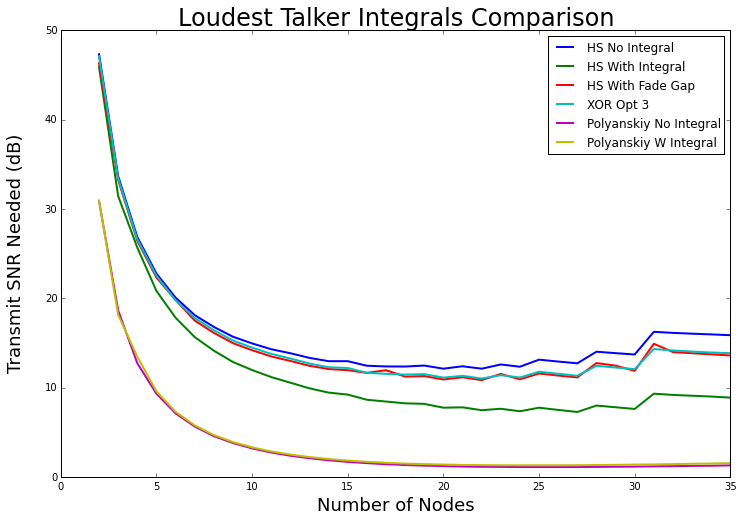

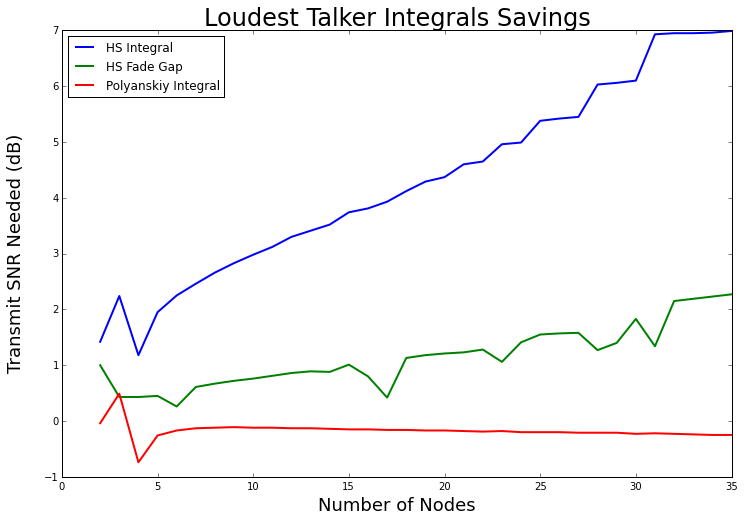

In [191]:
user_range = range(start_nodes, end_nodes)

figure(figsize=(12, 8))
plot(user_range, hsrs_up, lw=2.0, label='HS No Integral')
plot(user_range, hsrs_lti_up, lw=2.0, label='HS With Integral')
plot(user_range, hsrs_fade_gap, lw=2.0, label='HS With Fade Gap')
plot(user_range, opt_3_tSNR, lw=2.0, label='XOR Opt 3')
plot(user_range, polyup_lt, lw=2.0, label='Polyanskiy No Integral')
plot(user_range, polyup_lti, lw=2.0, label='Polyanskiy W Integral')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Integrals Comparison', fontsize=24)
savefig('loudest_integral_comparison_up.pdf', bbox='tight')

figure(figsize=(12, 8))
plot(user_range, hsrs_up-hsrs_lti_up, lw=2.0, label='HS Integral')
plot(user_range, hsrs_up-hsrs_fade_gap, lw=2.0, label='HS Fade Gap')
plot(user_range, polyup_lt-polyup_lti, lw=2.0, label='Polyanskiy Integral')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Integrals Savings', fontsize=24)
savefig('loudest_integral_savings_up.pdf', bbox='tight')

# Polyanskiy

In [184]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = 0
start_nodes, end_nodes = 2, 36

poly_scheme = '../data_tables/polyanskiy_up'
polyup_lt = loudest_talker(shannon_scheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
print polyup_lt

[ 30.9   18.64  12.72   9.31   7.11   5.63   4.56   3.78   3.18   2.72
   2.36   2.08   1.85   1.67   1.53   1.41   1.32   1.25   1.2    1.15
   1.12   1.11   1.09   1.09   1.09   1.09   1.11   1.13   1.14   1.17
   1.19   1.22   1.24   1.28]
CPU times: user 744 ms, sys: 38.8 ms, total: 783 ms
Wall time: 864 ms


In [190]:
%%time
threshold = 10**(-9)
endpoint = 2
dfade = [10**(-3), 10**(-10), 10**(-3)]
start_nodes, end_nodes = 2, 36

polyup_scheme = '../data_tables/polyanskiy_up'
polyup_lti = np.zeros((end_nodes-start_nodes,))

polyup_lti_dct = {N:0 for N in xrange(2, 36, 1)}

for dSNR in [10**i for i in range(0, -3, -1)]:
    for N in xrange(35, 1, -1):
        start_tSNR = polyup_lti_dct[N]
        polyup_lti[N-start_nodes] = loudest_talker_integral(N, polyup_scheme, start_tSNR, dfade, dSNR)
        polyup_lti_dct[N] = polyup_lti[N-start_nodes] - dSNR
        if N % 10 == 0:
            print N, polyup_lti[N-start_nodes]
# print ""

30 2.0
20 2.0
10 4.0
30 1.4
20 1.4
10 3.3
30 1.37
20 1.37
10 3.3
CPU times: user 5min 45s, sys: 35.8 s, total: 6min 21s
Wall time: 4min 8s


In [192]:
print "Polyanskiy No Integral Less Polyanskiy With Integral"
print polyup_lt - polyup_lti

Polyanskiy No Integral Less Polyanskiy With Integral
[-0.04  0.49 -0.74 -0.26 -0.17 -0.13 -0.12 -0.11 -0.12 -0.12 -0.13 -0.13
 -0.14 -0.15 -0.15 -0.16 -0.16 -0.17 -0.17 -0.18 -0.19 -0.18 -0.2  -0.2
 -0.2  -0.21 -0.21 -0.21 -0.23 -0.22 -0.23 -0.24 -0.25 -0.25]


# Loudest Talker No Integral Shannon

In [5]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = 0
start_nodes, end_nodes = 2, 36

shannon_scheme = '../data_tables/shannon_tables'
shannon_lt = loudest_talker(shannon_scheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
print shannon_lt

[ 30.9   18.64  12.72   9.31   7.11   5.63   4.56   3.78   3.18   2.72
   2.36   2.08   1.85   1.67   1.53   1.41   1.32   1.25   1.2    1.15
   1.12   1.11   1.09   1.09   1.09   1.09   1.11   1.13   1.14   1.17
   1.19   1.22   1.24   1.28]
CPU times: user 803 ms, sys: 32.6 ms, total: 835 ms
Wall time: 922 ms


In [14]:
%%time
%run ../cow.py

endpoint = 2
# dfade = [10**(-3), 10**(-10), 10**(-3)]
dfade = 10**(-3)
# dSNR = 1
# start_nodes, end_nodes = 2, 36

shannon_scheme = '../data_tables/shannon_tables'
shannon_lti_2 = np.zeros((end_nodes-start_nodes,))

shannon_lti_dct = {}
for N in xrange(35, 1, -1):
    shannon_lti_dct[N] = np.ceil(shannon_lt[N-2])
    for dSNR in [10**i for i in range(0, -3, -1)]:
        start_tSNR = shannon_lti_dct[N]
        shannon_lti_2[N-start_nodes] = loudest_talker_integral(N, shannon_scheme, start_tSNR, dfade, dSNR)
        shannon_lti_dct[N] = shannon_lti_2[N-start_nodes] - dSNR
        print N, shannon_lti_2[N-start_nodes]


<string>:181: RuntimeWarning: divide by zero encountered in log10
<string>:118: RuntimeWarning: invalid value encountered in true_divide
<string>:119: RuntimeWarning: invalid value encountered in greater
<string>:192: RuntimeWarning: invalid value encountered in log10
<string>:210: RuntimeWarning: divide by zero encountered in log10
<string>:225: RuntimeWarning: invalid value encountered in log10


35 1.0
35 0.0
35 -0.1
34 1.0


<string>:217: RuntimeWarning: divide by zero encountered in log10


KeyboardInterrupt: 

In [21]:
%%time
%run ../cow.py

endpoint = 2
# dfade = [10**(-3), 10**(-10), 10**(-3)]
dfade = 10**(-3)
# dSNR = 1
# start_nodes, end_nodes = 2, 36

shannon_scheme = '../data_tables/shannon_tables'
# shannon_lti = np.zeros((end_nodes-start_nodes,))

# shannon_lti_dct = {}
for N in xrange(4, 1, -1):
    shannon_lti_dct[N] = np.ceil(shannon_lt[N-2])
    for dSNR in [10**i for i in range(0, -3, -1)]:
        start_tSNR = shannon_lti_dct[N]
        shannon_lti[N-start_nodes] = loudest_talker_integral(N, shannon_scheme, start_tSNR, dfade, dSNR)
        shannon_lti_dct[N] = shannon_lti[N-start_nodes] - dSNR
        print N, shannon_lti[N-start_nodes]


<string>:159: RuntimeWarning: divide by zero encountered in log10
<string>:118: RuntimeWarning: invalid value encountered in true_divide
<string>:119: RuntimeWarning: invalid value encountered in greater
<string>:169: RuntimeWarning: divide by zero encountered in log10
<string>:216: RuntimeWarning: divide by zero encountered in log10
<string>:231: RuntimeWarning: divide by zero encountered in log10


4 13.0
4 12.8
4 12.72
3 19.0
3 18.2
3 18.11
2 31.0
2 30.9
2 30.9
CPU times: user 22.8 s, sys: 3.74 s, total: 26.6 s
Wall time: 13.9 s


In [22]:
# shannon_lti[4-2] = 12.79
print shannon_lti

[ 30.9   18.11  12.72   9.12   7.22   5.65   4.5    3.78   3.15   2.69
   2.35   2.08   1.85   1.68   1.52   1.41   1.32   1.25   1.2    1.14
   1.12   1.1    1.09   1.08   1.09   1.08   1.1    1.12   1.14   1.16
   1.18   1.21   1.24   1.28]


[ -2.84217094e-14   5.20000000e-01   3.55271368e-15   1.80000000e-01
  -1.10000000e-01  -3.00000000e-02   5.00000000e-02  -1.00000000e-02
   2.00000000e-02   2.00000000e-02   1.00000000e-02  -1.00000000e-02
  -6.66133815e-16  -1.00000000e-02  -4.44089210e-16  -4.44089210e-16
  -2.22044605e-16  -2.22044605e-16  -1.00000000e-02   1.00000000e-02
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -1.00000000e-02   1.00000000e-02   0.00000000e+00   0.00000000e+00
  -2.22044605e-16  -2.22044605e-16  -2.22044605e-16  -2.22044605e-16
  -2.22044605e-16  -2.22044605e-16]


[ -9.19796422e-16   2.87134180e-02   2.79301390e-16   1.97368421e-02
  -1.52354571e-02  -5.30973451e-03   1.11111111e-02  -2.64550265e-03
   6.34920635e-03   7.43494424e-03   4.25531915e-03  -4.80769231e-03
  -3.60072332e-16  -5.95238095e-03  -2.92163954e-16  -3.14956886e-16
  -1.68215610e-16  -1.77635684e-16  -8.33333333e-03   8.77192982e-03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e

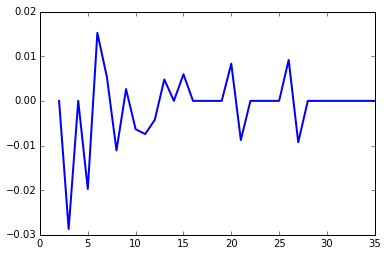

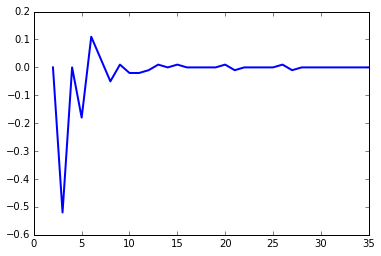

In [26]:
# Newer version of integral with slope condition
shannon_vasuki = array([70.4800000000000, 30.9000000000000, 18.6300000000000, 12.7200000000000, 9.30000000000000, 7.11000000000000, 
                  5.62000000000000, 4.55000000000000, 3.77000000000000, 3.17000000000000, 2.71000000000000, 2.36000000000000, 
                  2.07000000000000, 1.85000000000000, 1.67000000000000, 1.52000000000000, 1.41000000000000, 1.32000000000000, 
                  1.25000000000000, 1.19000000000000, 1.15000000000000, 1.12000000000000, 1.10000000000000, 1.09000000000000, 
                  1.08000000000000, 1.08000000000000, 1.09000000000000, 1.10000000000000, 1.12000000000000, 1.14000000000000, 
                  1.16000000000000, 1.18000000000000, 1.21000000000000, 1.24000000000000, 1.28000000000000])

print shannon_vasuki[1:] - shannon_lti
print '\n'
print (shannon_vasuki[1:] - shannon_lti) / shannon_lti
print '\n'
print shannon_lt - shannon_lti
print '\n'
print (shannon_lt - shannon_lti) / shannon_lti

plot(xrange(2, 36), (-shannon_vasuki[1:] + shannon_lti) / shannon_lti, lw=2.0)

figure()
plot(xrange(2, 36), shannon_lti - shannon_vasuki[1:], lw=2.0)
# plot((shannon_lt - shannon_lti) / shannon_lti, lw=2.0)
# legend(loc=0)

In [186]:
# Oldest version of integral
print "Loudest Talker No Integral"
print shannon_lt
print ""
print "Loudest Talker With Integral"
print shannon_lti
print ""
print "Difference"
print shannon_lt - shannon_lti

Loudest Talker No Integral
[ 30.9   18.64  12.72   9.31   7.11   5.63   4.56   3.78   3.18   2.72
   2.36   2.08   1.85   1.67   1.53   1.41   1.32   1.25   1.2    1.15
   1.12   1.11   1.09   1.09   1.09   1.09   1.11   1.13   1.14   1.17
   1.19   1.22   1.24   1.28]

Loudest Talker With Integral
[ 30.9   18.63  13.55   9.78   7.24   5.66   4.63   3.79   3.22   2.75
   2.35   2.09   1.85   1.68   1.53   1.41   1.33   1.26   1.2    1.16
   1.12   1.1    1.1    1.09   1.1    1.09   1.11   1.13   1.14   1.17
   1.19   1.22   1.24   1.28]

Difference
[  2.00373051e-12   1.00000000e-02  -8.30000000e-01  -4.70000000e-01
  -1.30000000e-01  -3.00000000e-02  -7.00000000e-02  -1.00000000e-02
  -4.00000000e-02  -3.00000000e-02   1.00000000e-02  -1.00000000e-02
   6.66133815e-16  -1.00000000e-02   6.66133815e-16   6.66133815e-16
  -1.00000000e-02  -1.00000000e-02   6.66133815e-16  -1.00000000e-02
   6.66133815e-16   1.00000000e-02  -1.00000000e-02   6.66133815e-16
  -1.00000000e-02   6.66133815e

[ -2.84217094e-14  -1.42108547e-14  -8.30000000e-01  -4.80000000e-01
  -1.30000000e-01  -4.00000000e-02  -8.00000000e-02  -2.00000000e-02
  -5.00000000e-02  -4.00000000e-02   1.00000000e-02  -2.00000000e-02
  -6.66133815e-16  -1.00000000e-02  -1.00000000e-02  -4.44089210e-16
  -1.00000000e-02  -1.00000000e-02  -1.00000000e-02  -1.00000000e-02
   0.00000000e+00   0.00000000e+00  -1.00000000e-02  -1.00000000e-02
  -2.00000000e-02   0.00000000e+00  -1.00000000e-02  -1.00000000e-02
  -2.22044605e-16  -1.00000000e-02  -1.00000000e-02  -1.00000000e-02
  -2.22044605e-16  -2.22044605e-16]


[ -9.19796422e-16  -7.62794134e-16  -6.12546125e-02  -4.90797546e-02
  -1.79558011e-02  -7.06713781e-03  -1.72786177e-02  -5.27704485e-03
  -1.55279503e-02  -1.45454545e-02   4.25531915e-03  -9.56937799e-03
  -3.60072332e-16  -5.95238095e-03  -6.53594771e-03  -3.14956886e-16
  -7.51879699e-03  -7.93650794e-03  -8.33333333e-03  -8.62068966e-03
   0.00000000e+00   0.00000000e+00  -9.09090909e-03  -9.17431193e

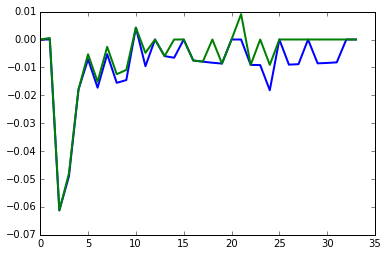

In [187]:
shannon_vasuki = array([70.4800000000000, 30.9000000000000, 18.6300000000000, 12.7200000000000, 9.30000000000000, 7.11000000000000, 
                  5.62000000000000, 4.55000000000000, 3.77000000000000, 3.17000000000000, 2.71000000000000, 2.36000000000000, 
                  2.07000000000000, 1.85000000000000, 1.67000000000000, 1.52000000000000, 1.41000000000000, 1.32000000000000, 
                  1.25000000000000, 1.19000000000000, 1.15000000000000, 1.12000000000000, 1.10000000000000, 1.09000000000000, 
                  1.08000000000000, 1.08000000000000, 1.09000000000000, 1.10000000000000, 1.12000000000000, 1.14000000000000, 
                  1.16000000000000, 1.18000000000000, 1.21000000000000, 1.24000000000000, 1.28000000000000])

print shannon_vasuki[1:] - shannon_lti
print '\n'
print (shannon_vasuki[1:] - shannon_lti) / shannon_lti
print '\n'
print shannon_lt - shannon_lti
print '\n'
print (shannon_lt - shannon_lti) / shannon_lti

plot((shannon_vasuki[1:] - shannon_lti) / shannon_lti, lw=2.0)
plot((shannon_lt - shannon_lti) / shannon_lti, lw=2.0)
legend(loc=0)

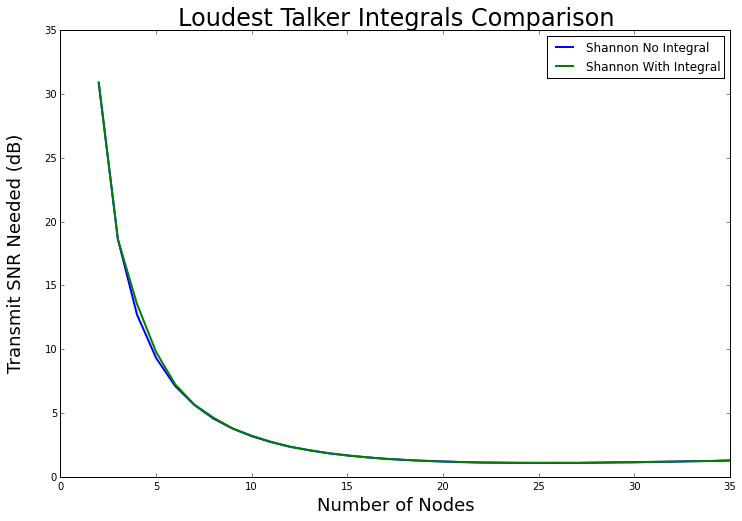

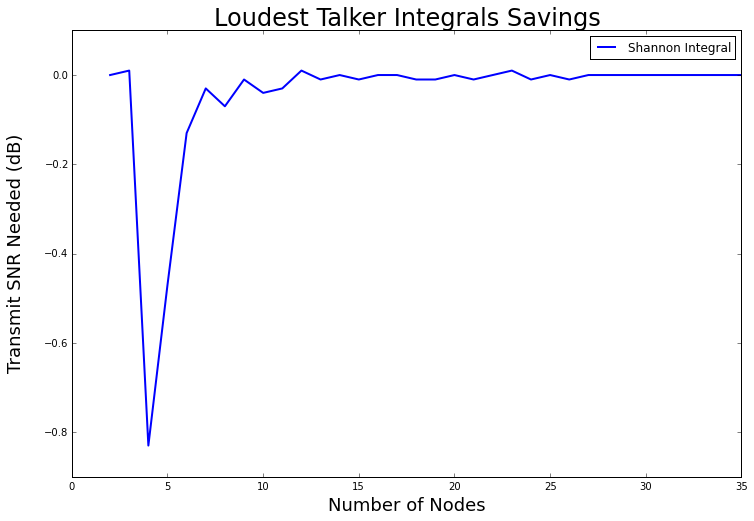

In [188]:
user_range = range(start_nodes, end_nodes)

figure(figsize=(12, 8))
plot(user_range, shannon_lt, lw=2.0, label='Shannon No Integral')
plot(user_range, shannon_lti, lw=2.0, label='Shannon With Integral')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Integrals Comparison', fontsize=24)
savefig('shannon_integral_comparison.pdf', bbox='tight')

figure(figsize=(12, 8))
plot(user_range, shannon_lt-shannon_lti, lw=2.0, label='Shannon Integral')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Integrals Savings', fontsize=24)
savefig('shannon_integral_savings.pdf', bbox='tight')

[  2.00373051e-12   1.00000000e-02  -8.30000000e-01  -4.70000000e-01
  -1.30000000e-01  -3.00000000e-02  -7.00000000e-02  -1.00000000e-02
  -4.00000000e-02  -3.00000000e-02   1.00000000e-02  -1.00000000e-02
   6.66133815e-16  -1.00000000e-02   6.66133815e-16   6.66133815e-16
  -1.00000000e-02  -1.00000000e-02   6.66133815e-16  -1.00000000e-02
   6.66133815e-16   1.00000000e-02  -1.00000000e-02   6.66133815e-16
  -1.00000000e-02   6.66133815e-16   6.66133815e-16   6.66133815e-16
   6.66133815e-16   6.66133815e-16   6.66133815e-16   6.66133815e-16
   6.66133815e-16   6.66133815e-16]


[  6.48456477e-14   5.36480687e-04  -6.52515723e-02  -5.04833512e-02
  -1.82841069e-02  -5.32859680e-03  -1.53508772e-02  -2.64550265e-03
  -1.25786164e-02  -1.10294118e-02   4.23728814e-03  -4.80769231e-03
   3.60072332e-16  -5.98802395e-03   4.35381578e-16   4.72435330e-16
  -7.57575758e-03  -8.00000000e-03   5.55111512e-16  -8.69565217e-03
   5.94762335e-16   9.00900901e-03  -9.17431193e-03   6.11131940e

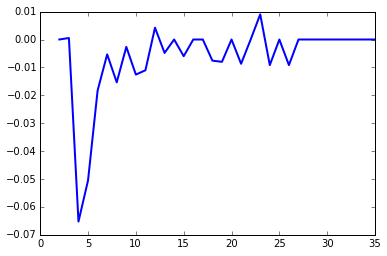

In [189]:
print shannon_lt - shannon_lti
print '\n'
x = (shannon_lt - shannon_lti) / shannon_lt
y = (shannon_lt - shannon_lti) / shannon_lti

print x
print y

plot(user_range, x, lw=2.0)

# Debugging

In [108]:
%%time
N = 2

shannon_scheme = '../data_tables/shannon_tables'
filename = shannon_scheme + '/n' + str(N) + '.in'
codetable = load_table(filename)

i_range = range(-15, -8)
psingles = []
pprotocols = []

for padd in [10**i for i in i_range]:
    rSNR = codetable[0][np.where(np.array(codetable[1])<=padd)[0][0]]

    tSNR = 30.9
    hcrit = 10**((rSNR - tSNR)/10) # linear fade
    pbadfade = 1 - np.exp(-hcrit)
    psingle = pbadfade + (1-pbadfade)*padd

    pprotocol = sum([nCr(N, a) * (1-psingle)**a * psingle**(N-a) *
                         (1-(1-(pbadfade**a + (1-pbadfade**a) * padd))**(N-a)) for a in range(N)])
    
    psingles.append(psingle)
    pprotocols.append(pprotocol)

CPU times: user 2.69 ms, sys: 4.44 ms, total: 7.13 ms
Wall time: 8.2 ms


In [111]:
print pprotocols
print min(pprotocols)

[9.9794832369747088e-10, 9.9794832468207327e-10, 9.9794833453214642e-10, 9.9794843301668436e-10, 9.9794941787447768e-10, 9.9795926649129008e-10, 9.9805775534031657e-10]
9.97948323697e-10


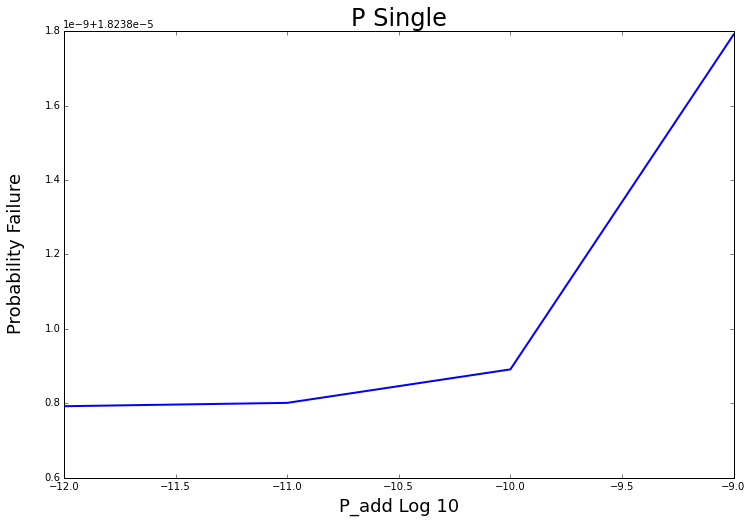

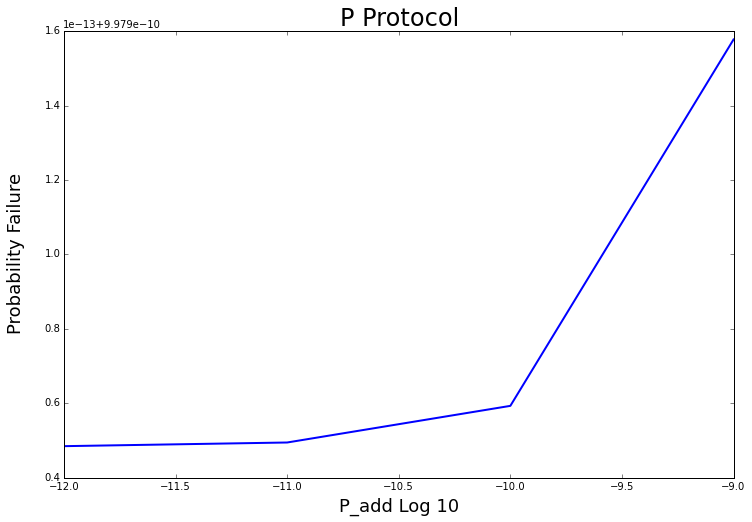

In [107]:
figure(figsize=(12, 8))
plot(i_range, psingles, lw=2.0)
legend(loc=0)
xlabel('P_add Log 10', fontsize=18)
ylabel('Probability Failure', fontsize=18, labelpad=20)
title('P Single', fontsize=24)
# savefig('shannon_integral_savings.pdf', bbox='tight')

figure(figsize=(12, 8))
plot(i_range, pprotocols, lw=2.0)
legend(loc=0)
xlabel('P_add Log 10', fontsize=18)
ylabel('Probability Failure', fontsize=18, labelpad=20)
title('P Protocol', fontsize=24)
# savefig('shannon_integral_savings.pdf', bbox='tight')

In [17]:
%%time
# %run ../cow.py
N = 3

shannon_scheme = '../data_tables/shannon_tables'
filename = shannon_scheme + '/n' + str(N) + '.in'
codetable = load_table(filename)

tablefunc = interp1d(codetable[0], codetable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
# rSNR2 = codetable[0][np.where(np.array(codetable[1])<=pa2)[0][0]]

tSNR = 18.63

psingle = p_single_integral(tablefunc, tSNR, dfade, endpoint)
print psingle
# rv = binom(N, 1-psingle)
# a_range = np.arange(0, N, 1)
# pmax_array = np.array([p_max(tablefunc, a, tSNR, endpoint, dfade) for a in a_range])
# pprotocol = np.dot(rv.pmf(a_range), (1 - (1 - pmax_array)**(N - a_range)))

# print (1 - (1 - pmax_array)**(N - a_range))
# print rv.pmf(a_range)
# print rv.pmf(a_range) * (1 - (1 - pmax_array)**(N - a_range))

# print psingle
# print pprotocol

0.0005
CPU times: user 121 ms, sys: 47.2 ms, total: 169 ms
Wall time: 187 ms


<string>:186: RuntimeWarning: divide by zero encountered in log10


In [158]:
%run ../cow.py
z = loudest_talker(shannon_scheme, 0.01, 10**(-9), 0.1, 18.62, 3, 4)

18.63
0.000464407504659
[1.0, 0.0009285993349879007, 2.1577423747753954e-07]
[1.0016077759251668e-10, 6.4672250881831546e-07, 0.001391928768477349]
[1.0016077759251668e-10, 6.0054609161039452e-10, 3.0034236864125067e-10]
18.64
0.000463339644754
[1.0, 0.00092646460588263757, 2.1478353373627357e-07]
[9.9471435191344687e-11, 6.4375246489807327e-07, 0.0013887311309193641]
[9.9471435191344687e-11, 5.9641387367776989e-10, 2.9827657970843258e-10]


[30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141]


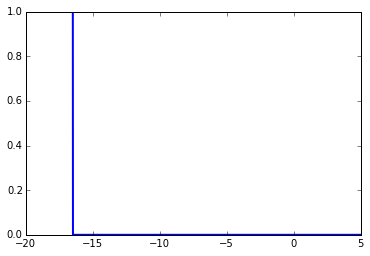

In [133]:
%run ../cow.py
lt_test = []
i_range = np.arange(-100, 1, 10)
for i in 10**i_range:
    z = loudest_talker(shannon_scheme, 0.01, 10**(-9), i, 30, 2, 3)
    lt_test.append(z[0])
print lt_test

# print codetable[1][-1]
plot(codetable[0], codetable[1], lw=2.0)

In [131]:
print 10**(-100)

1e-100
